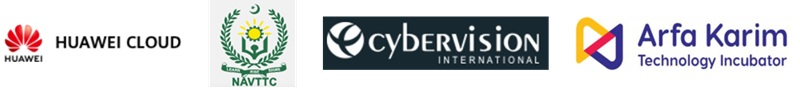

---

# **Huawei Cloud AI Training Day 31 - Part A**


# Vanilla MLP on CIFAR-10

## This MLP takes flattened CIFAR-10 images.  

## Passes through 3 dense hidden layers (1024 → 512 → 256) with ReLU activation and dropout regularization.

## Final softmax layer outputs class probabilities.

## Adam optimizer adjusts weights efficiently, and sparse categorical crossentropy measures how well the model predicts the correct class given integer labels.

In [ ]:
import os, random, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

In [ ]:
# Reproducibility
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

In [ ]:
# 1) Load CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.squeeze();
y_test = y_test.squeeze()

In [ ]:
# 2) Preprocess: normalize to [0,1], then flatten for MLP
x_train = (x_train.astype("float32") / 255.0).reshape(len(x_train), -1)
x_test  = (x_test.astype("float32")  / 255.0).reshape(len(x_test),  -1)

num_classes = 10
input_dim = x_train.shape[1]

In [ ]:
print(input_dim)

3072


In [ ]:
# 3) Build a simple MLP
def build_mlp(input_dim, num_classes):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = build_mlp(input_dim, num_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

## Adam Optimizer

Adam = Adaptive Moment Estimation.
It’s a gradient-based optimization method that:

Keeps track of:

1. m = moving average of the gradient (first moment).

2. v = moving average of the squared gradient (second moment).

Uses these to adapt the learning rate for each parameter individually.

Benefits:

1. Usually converges faster than vanilla SGD.

2. Works well with little tuning for many problems.

3. Common defaults: learning_rate=1e-3, β₁=0.9, β₂=0.999, ε=1e-7.

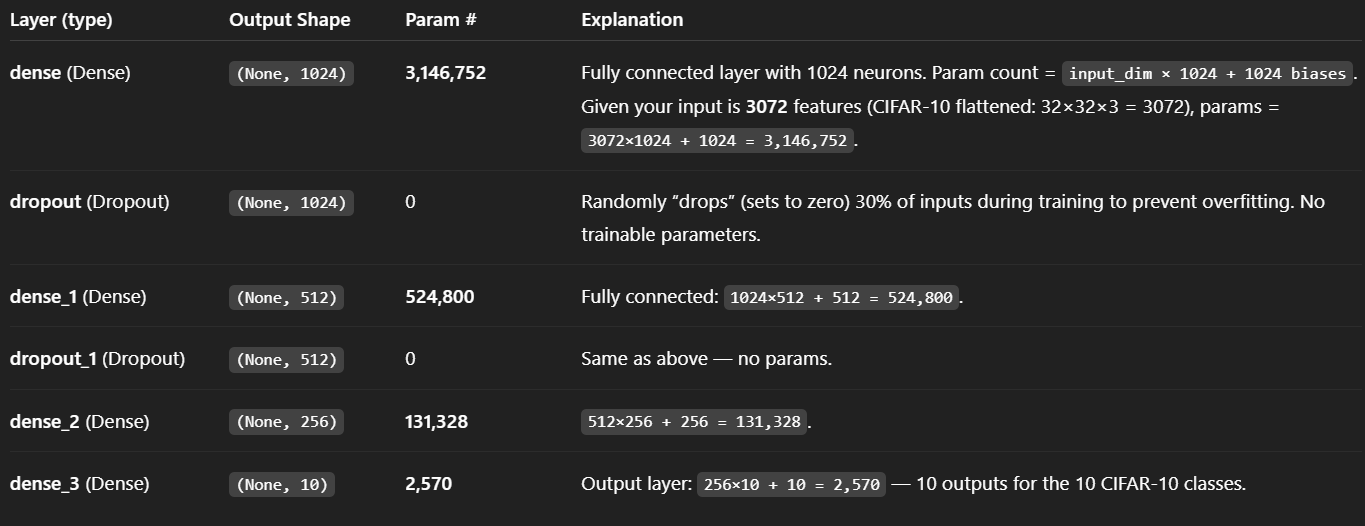

### Totals

Total params = 3,805,450 (≈ 14.52 MB in memory for float32 weights).

Trainable params = same as total here (all layers are trainable).

Non-trainable params = 0 (no frozen layers).

In [ ]:
# 4) Train
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=256,
    verbose=1
)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.2015 - loss: 2.2640 - val_accuracy: 0.3542 - val_loss: 1.7920
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3384 - loss: 1.8204 - val_accuracy: 0.3776 - val_loss: 1.7554
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3692 - loss: 1.7453 - val_accuracy: 0.4006 - val_loss: 1.6888
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3853 - loss: 1.7043 - val_accuracy: 0.4222 - val_loss: 1.6426
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4012 - loss: 1.6691 - val_accuracy: 0.4396 - val_loss: 1.5891
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4095 - loss: 1.6253 - val_accuracy: 0.4408 - val_loss: 1.5703
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4192 - loss: 1.6139 - val_accuracy: 0.4434 - val_loss: 1.5534
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4325 - loss: 1.5786 - val_accuracy: 0

In [ ]:
# 5) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n[MLP] Test accuracy: {test_acc:.4f}")

# Classification report
y_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
print("\n[MLP] Classification report:")
print(classification_report(y_test, y_pred, digits=4))


[MLP] Test accuracy: 0.4975

[MLP] Classification report:
              precision    recall  f1-score   support

           0     0.5016    0.6300    0.5585      1000
           1     0.6093    0.6440    0.6262      1000
           2     0.3947    0.1800    0.2473      1000
           3     0.3584    0.3290    0.3431      1000
           4     0.3803    0.5020    0.4328      1000
           5     0.5025    0.2970    0.3734      1000
           6     0.5058    0.5680    0.5351      1000
           7     0.5199    0.6010    0.5575      1000
           8     0.5946    0.6440    0.6183      1000
           9     0.5577    0.5800    0.5686      1000

    accuracy                         0.4975     10000
   macro avg     0.4925    0.4975    0.4861     10000
weighted avg     0.4925    0.4975    0.4861     10000



In [ ]:
# 6) Save model
#os.makedirs("saved_models", exist_ok=True)
#model.save("saved_models/mlp_cifar10.keras")
#print("\nSaved to saved_models/mlp_cifar10.keras")
